In [695]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [696]:
cars1 = pd.read_csv('C:/Users/nisha/Documents/Projects/New folder/Datasets/train-data.csv',index_col=0)
cars2 = pd.read_csv('C:/Users/nisha/Documents/Projects/New folder/Datasets/test-data.csv',index_col=0)
cars = pd.concat([cars1,cars2],axis=0)

In [697]:
cars['Brands'] = cars['Name'].apply(lambda x:x.split()[0])
cars['Models'] = cars['Name'].apply(lambda x:x.split()[1])
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brands,Models
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,A4


In [698]:
cars.Brands.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [699]:
cars.drop('New_Price',inplace=True,axis=1)
cars.dropna(inplace=True)


In [700]:
cars.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brands', 'Models'],
      dtype='object')

In [701]:
cars['Power'] = cars['Power'].str.replace('bhp',' ')
cars['Engine'] = cars['Engine'].str.replace('CC',' ')
cars['Mileage'] = cars['Mileage'].str.replace('km/kg',' ')
cars['Mileage'] = cars['Mileage'].str.replace('kmpl',' ')

In [702]:
import re
cars['Power'] = cars['Power'].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))

In [703]:
#.astype(float)
cars['Power'] = pd.to_numeric(cars['Power'])
cars['Engine'] = pd.to_numeric(cars['Engine'])
cars['Mileage'] = pd.to_numeric(cars['Mileage'])

In [704]:
cars.dropna(inplace=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   int64  
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
 12  Brands             5872 non-null   object 
 13  Models             5872 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 688.1+ KB


power,Engine,Mileage,Owner Type,Fuel Type,Location,Name

In [705]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brands,Models
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,Audi,A4


In [706]:
print(cars['Fuel_Type'].unique())
print(cars['Transmission'].unique())
print(cars['Owner_Type'].unique())
print(cars['Location'].unique())

['CNG' 'Diesel' 'Petrol' 'LPG']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']


<AxesSubplot:>

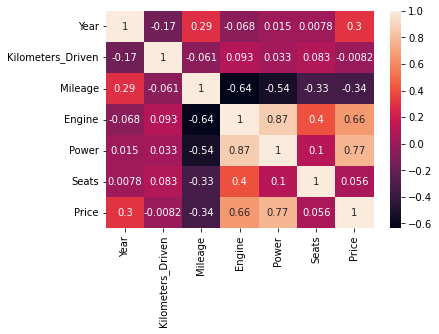

In [707]:
sns.heatmap(cars.corr(),annot=True)

In [708]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brands,Models
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,Audi,A4


Scaling

In [709]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor

Scaling

'Name'x, 'Location'x, 'Year', 'Kilometers_Driven', 'Fuel_Type'x,
       'Transmission'x, 'Owner_Type'x, 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'

In [710]:
#scalar = StandardScaler()
#k=cars[['Year','Kilometers_Driven','Mileage','Engine','Power','Seats']]
#scalar.fit(k)
#cars_norm=scalar.fit_transform(k)
#cars_norm=pd.DataFrame(cars_norm,columns=['Year','Kilometers_Driven','Mileage','Engine','Power','Seats'])
#cars_norm.head()

In [711]:
X = cars.drop(['Price','Name'],axis=1)
y= cars['Price']

In [840]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)

In [841]:
numeric_pipeline = Pipeline([
    ('num_pipe', StandardScaler()),
    ('impute', SimpleImputer(strategy='mean'))
])

categoric_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('cat_pipe', OneHotEncoder(handle_unknown='ignore'))    
])

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Seats']),
    ('categoric', categoric_pipeline, ['Brands','Models', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Power'])
])



In [842]:
pipeline = Pipeline([
      ('pre',preprocessor),
      #('poly',PolynomialFeatures(2)),
      ('algo',LinearRegression())
])
#pipeline3 = make_pipeline(preprocessor,PolynomialFeatures(2),LinearRegression())

In [843]:
pipeline.fit(X_train,y_train)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('num_pipe',
                                                                   StandardScaler()),
                                                                  ('impute',
                                                                   SimpleImputer())]),
                                                  ['Year', 'Kilometers_Driven',
                                                   'Mileage', 'Engine',
                                                   'Seats']),
                                                 ('categoric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_pipe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Brands', 'Models',
                                                   'Location', 'Fuel_Type',
                                                   'Transmission', 'Owner_Type',
                                                   'Power'])])),
                ('algo', LinearRegression())])

In [844]:
print(pipeline.score(X_train,y_train))
print(pipeline.score(X_test,y_test))

0.9245786106995352
0.8640362424389487


In [845]:
X_test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brands,Models
1295,Kochi,2014,54173,Petrol,Manual,First,18.88,999,123.24,5.0,Ford,EcoSport
2244,Kochi,2015,64399,Diesel,Manual,First,21.90,1396,90.00,5.0,Hyundai,i20
1091,Mumbai,2011,64984,Petrol,Automatic,First,16.95,1197,78.90,5.0,Hyundai,i10
4027,Coimbatore,2017,21363,Petrol,Automatic,First,13.00,1591,121.30,5.0,Hyundai,Creta
2659,Kolkata,2015,25100,Diesel,Automatic,First,17.85,2967,300.00,4.0,Porsche,Panamera


In [846]:
X_test.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Brands',
       'Models'],
      dtype='object')

In [847]:
pipeline.predict(pd.DataFrame([['Hyderabad',2013,120000,'Petrol','Manual','First',19,1496,88.9,4,'Land','Rover']],
columns=[ 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Brands','Models']))

array([26.37861721])

In [848]:
X_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brands,Models
2146,Bangalore,2011,80000,Diesel,Manual,First,20.54,1598,103.60,5.0,Volkswagen,Vento
157,Kolkata,2016,6000,Petrol,Manual,First,20.63,1198,67.06,5.0,Datsun,GO
4769,Kochi,2017,24310,CNG,Manual,First,33.44,796,40.30,4.0,Maruti,Alto
233,Hyderabad,2016,64000,Diesel,Manual,First,22.90,1248,74.00,5.0,Maruti,Swift
1451,Hyderabad,2014,51355,Diesel,Automatic,First,14.84,2143,170.00,5.0,Mercedes-Benz,New


In [849]:
#print(pipeline2.score(X_train,y_train))
#print(pipeline2.score(X_test,y_test))

In [856]:
#import pickle 
#model_name = 'cars_price_pred.pkl'
#pickle.dump(pipeline,open(model_name,'wb'))




In [857]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brands,Models
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,Audi,A4


Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Lamborghini,Land,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo

In [858]:
l=['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Lamborghini', 'Land', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Porsche', 'Renault', 'Skoda', 'Smart', 'Tata', 'Toyota', 'Volkswagen', 'Volvo']

In [859]:
X.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brands,Models
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,Audi,A4


In [860]:
#models={i:X[cars.Name.str.contains(i)]['Name'] for i in l}
#models['Audi']
#import pickle 
#mdls=pickle.dump(models,open('models.pkl','wb'))

In [861]:
cars.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.277839,1625.745572,113.276894,5.283719,9.603919
std,3.164568,9.216941e+04,4.365657,601.641783,53.881892,0.805081,11.249453
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.342250e+04,15.260000,1198.000000,75.000000,5.000000,3.517500
50%,2014.000000,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000
